Задание

Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
Cохранить результаты в pandas dataframe

Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных: -- Привести колонки датафрейма к одному типу данных -- Проверить индекс, чтобы он соответствовал порядку строк -- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки

Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов. -- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. -- Рассчитать объемы вводимого жилья по регионам и по годам. -- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах -- Визуализировать разброс, связь и распределение этих показателей по регионам -- Сделать выводы по каждому из расчетов и графиков

In [33]:
!pip install missingno

In [55]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [69]:
df = pd.read_excel('objects_data.xlsx')
df

,Unnamed: 0,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,0,32787,181636,16,"г Набережные Челны, вдоль проспекта Яшьлек, бл...","ЖК ""Современный""",12.0,13,99,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,32793,162963,50,"г Красногорск, район Марьино, корпус 25","Микрогород ""В лесу""",9.0,13,545,2023-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,32849,167016,37,"г Кохма, улица Ивановская, литера В, 5 этап","Микрорайон ""Тихий Берег"", 004",8.0,8,183,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,32873,141586,42,"г Кемерово, бульвар Строителей, д. 60, корпус 4/1",NaN,12.0,14,189,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,32892,117906,50,"с/п Павло-Слободское, улица Красная, д. 9","ЖК ""СКАЗКА"" дом 64",3.0,3,22,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,10593,32618,152681,24,"г Красноярск, район Советский, переулок Светло...","Жилой комплекс ""пер.Светлогорский II очередь о...",10.0,20,288,2025-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10594,10594,32629,173074,27,"город Хабаровск, переулок Гражданский, д. 9","Жилой Комплекс ""Кристалл""",25.0,25,89,2022-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10595,10595,32677,174688,69,"г Тверь, ул Планерная, д. 10, блок-секция 7,8,9","ЖК ""Созвездие"", ЖИЛОЙ КОМПЛЕКС ""СОЗВЕЗДИЕ""",11.0,11,129,2024-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10596,10596,32710,90412,50,"г Дзержинский, улица Угрешская, д. 19","Red.19 (Республика Дзержинский, 19)",9.0,9,0,2022-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Рассчёт и визуализация средней цены за квадратный метр по регионам
# будем анализировать цену по полю "region", так как застройщик может строить в разных регионах
# Удаляем строки, в которых средняя цена за квадратный метр отсутствует
df = df[df.objPriceAvg.notnull()]
df.shape

(7671, 109)

<AxesSubplot:>

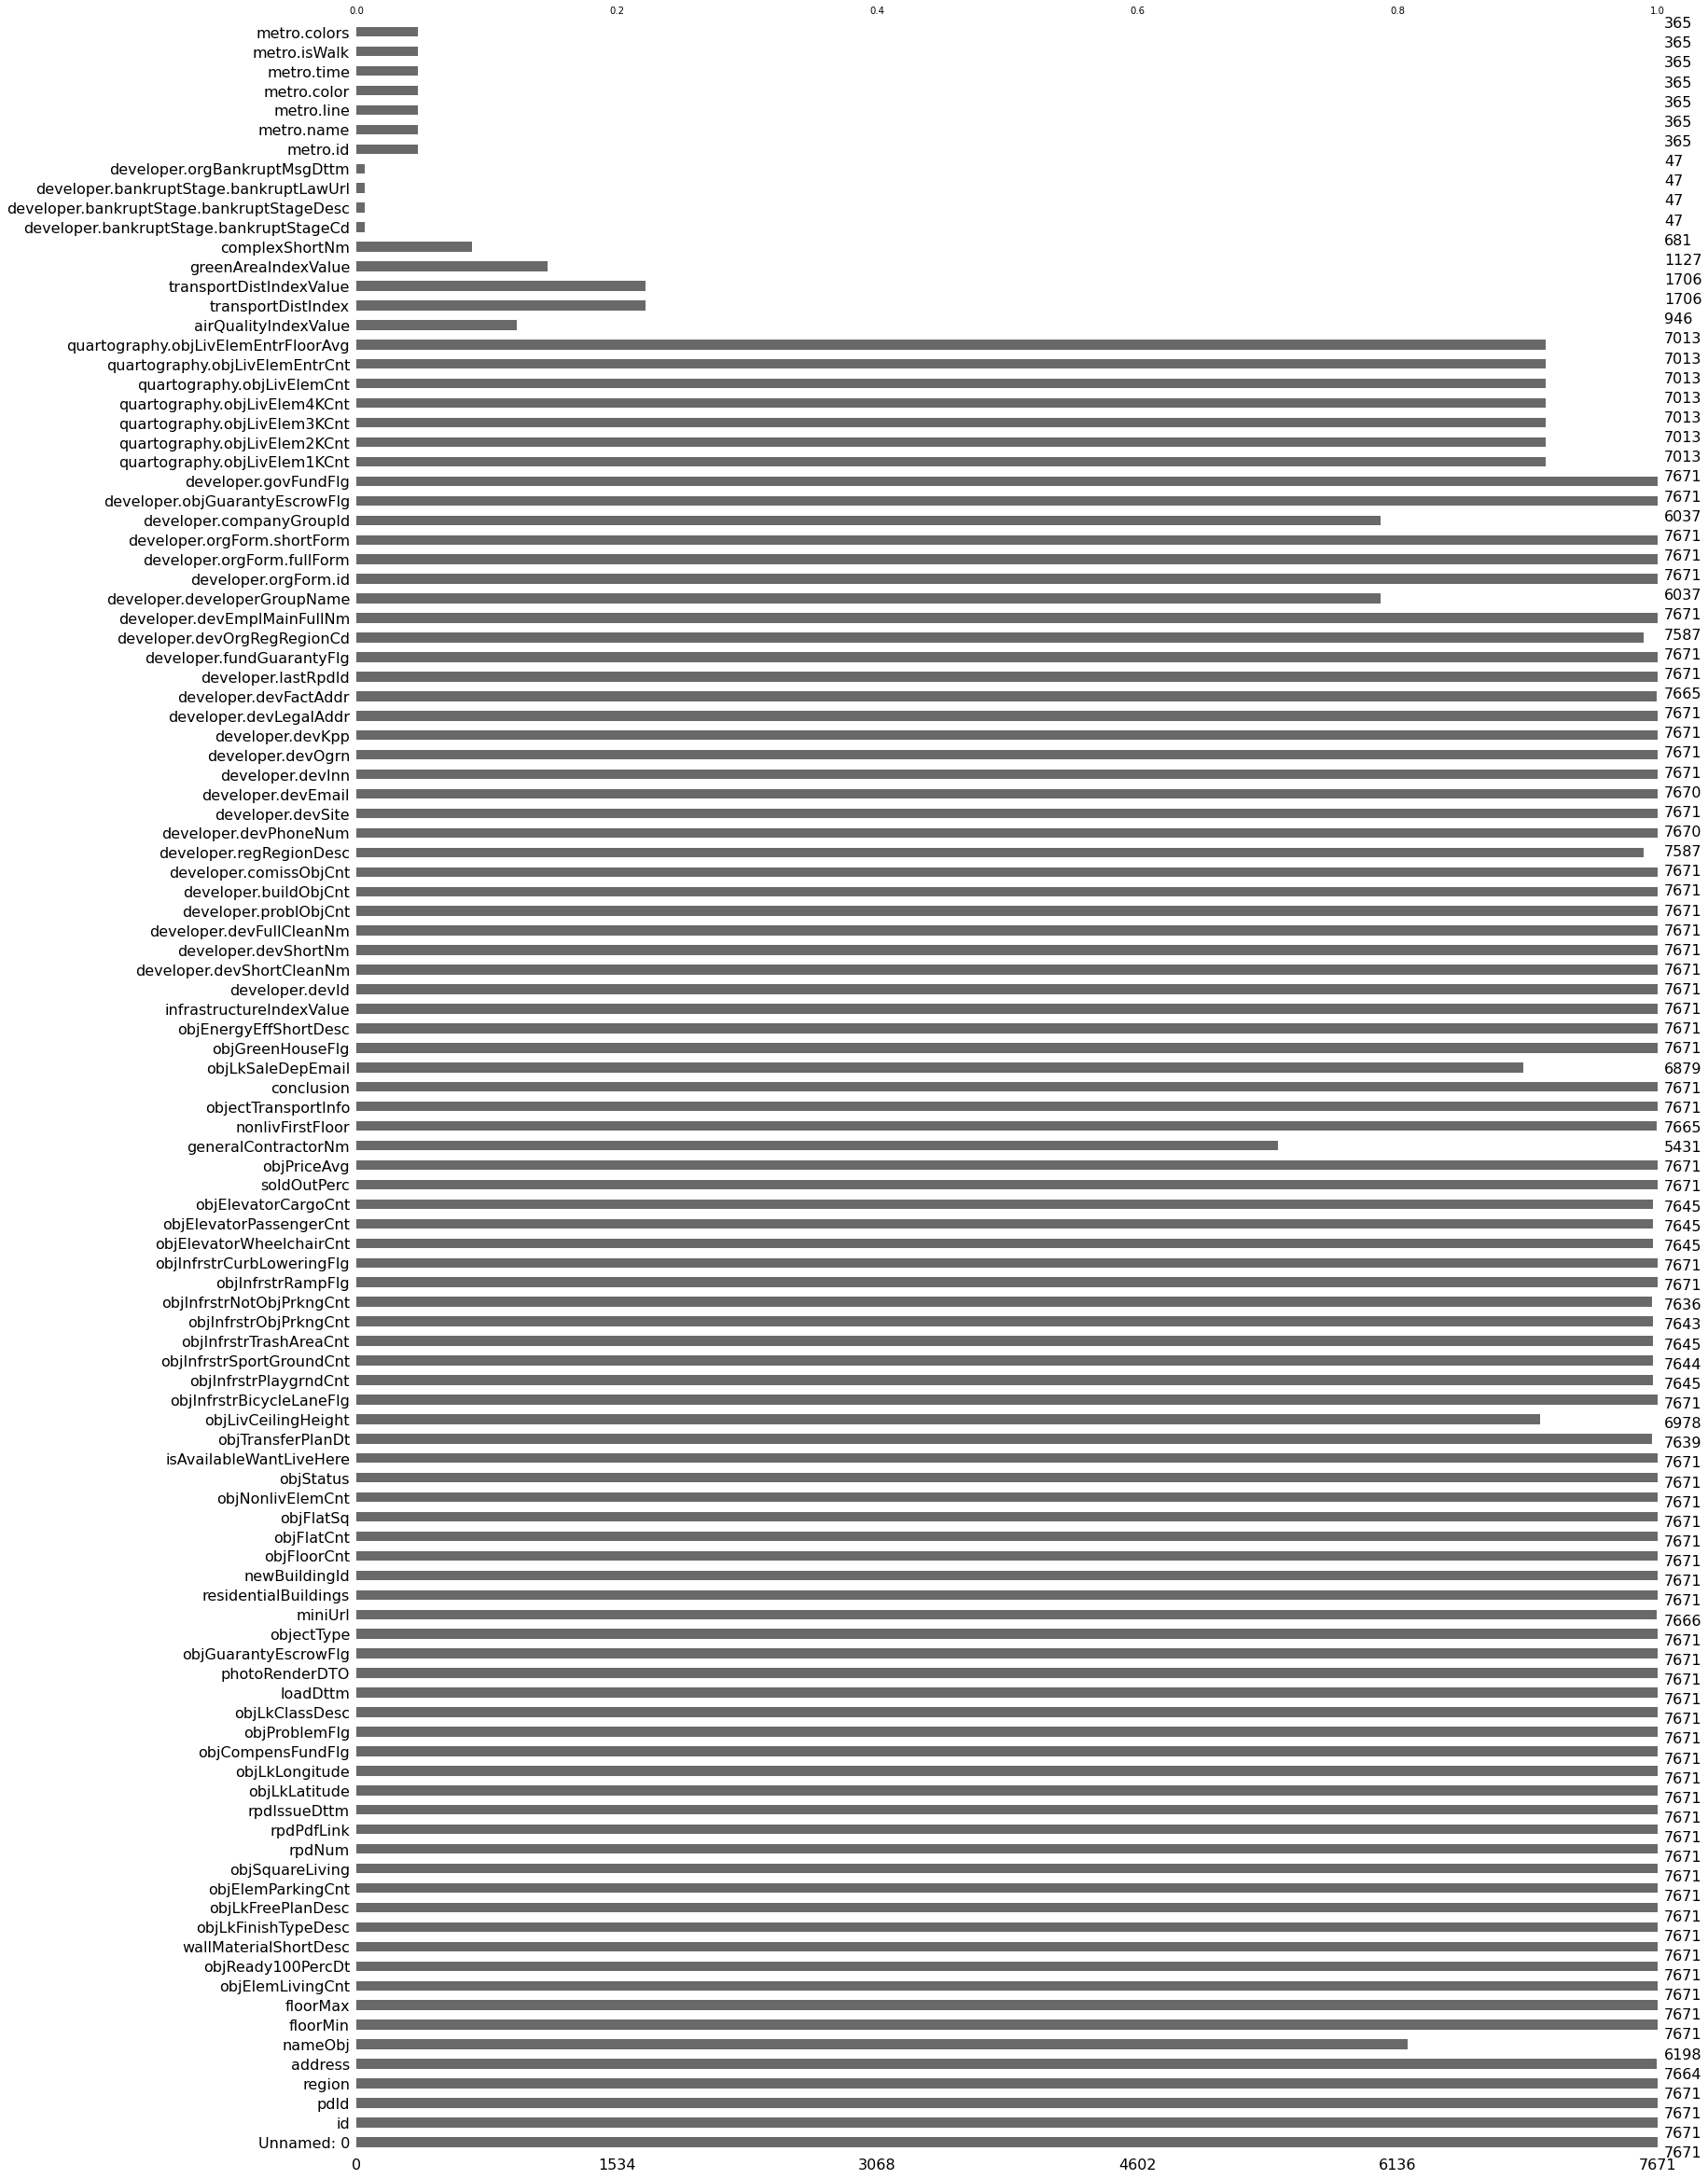

In [71]:
# визуализируем пропуски в датасете
msno.bar(df)

Как видим, пропуски есть. Для категориальных данных, на мой взгляд, самый лучший подход по заполнению пропусков - заполнять их строкой "недостаточно данных", как новый категориальный признак, а для числовых - средним или медианным значением. Нельзя исключать такую ситуацию, что, возможно, качество модели после проделывания вышеперечисленных действий может упасть. 

In [72]:
df[['region', 'developer.regRegionDesc']].groupby('developer.regRegionDesc').region.unique()

developer.regRegionDesc
Адыгея Республика                              [23, 1]
Алтай Республика                           [4, 22, 42]
Алтайский край                            [22, 54, 47]
Амурская область                                  [28]
Архангельская область                         [29, 47]
                                          ...         
Челябинская область                [89, 74, 2, 66, 86]
Чеченская Республика                              [20]
Чувашская Республика                          [21, 12]
Ямало-Ненецкий Автономный округ               [89, 43]
Ярославская область                       [76, 35, 44]
Name: region, Length: 79, dtype: object

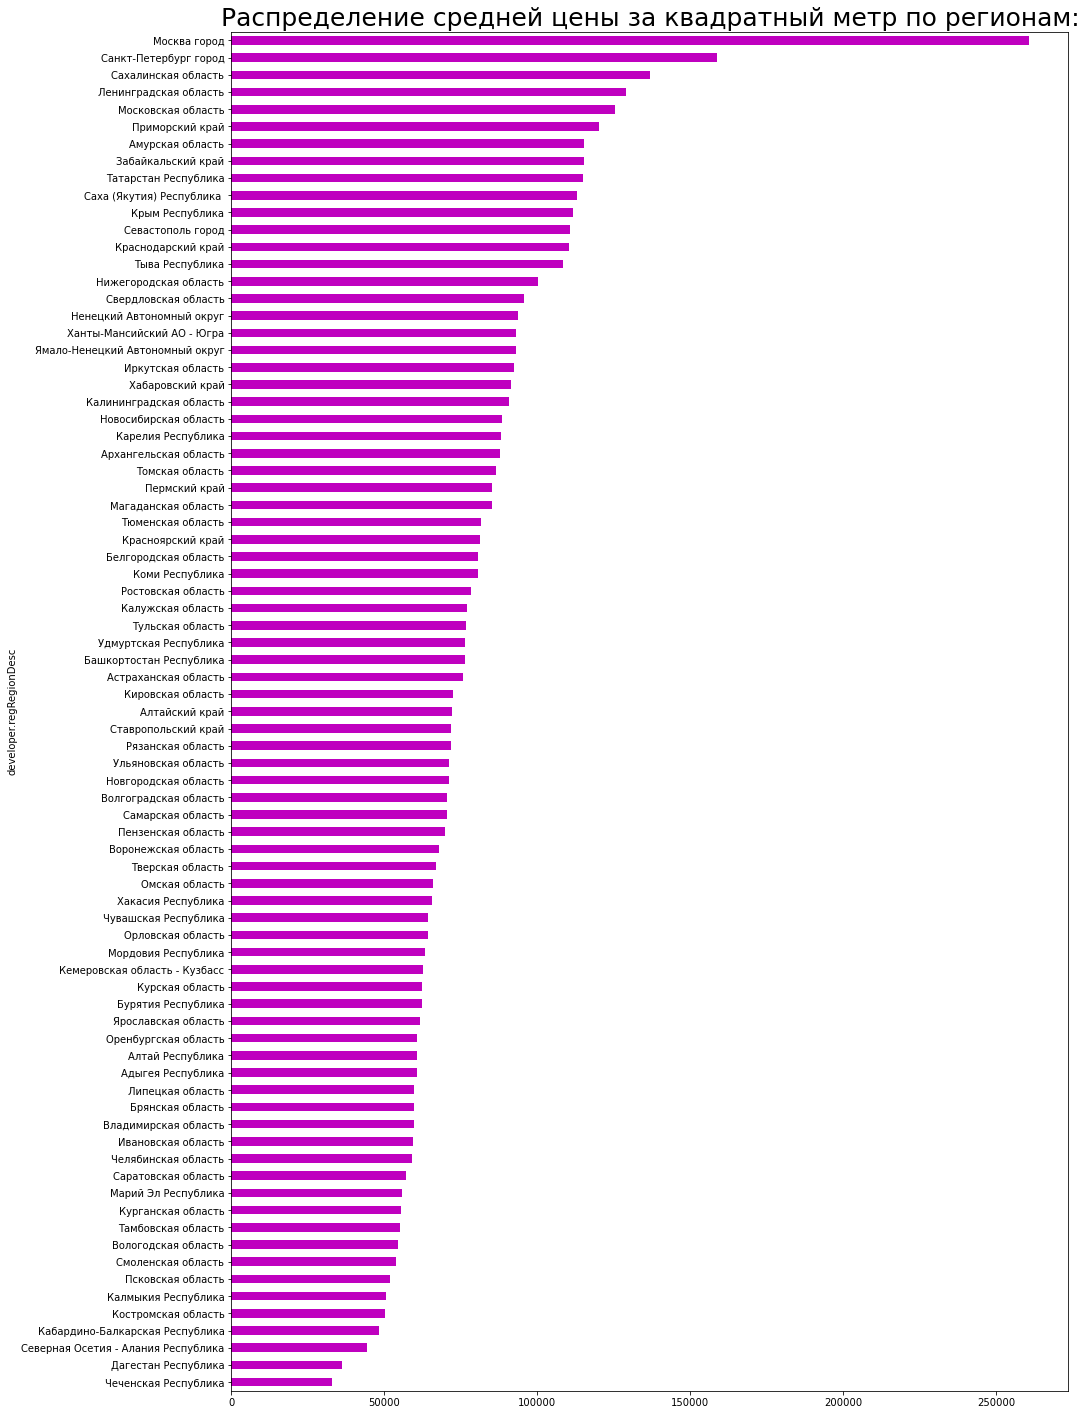

In [91]:
import os
from pylab import rcParams
import seaborn as sns

prices = df.groupby('developer.regRegionDesc')['objPriceAvg'].mean()
prices.sort_values().plot(figsize=(15, 25), kind='barh', color='m')
plt.title('Распределение средней цены за квадратный метр по регионам:', size=25)
plt.show()

In [82]:
print('В топ-3 регионов с наибольшей средней стоимостью квадратного метра жилья входят:')
for i, row in mean_price_per_region.sort_values('objPriceAvg', ascending=False).head(3).iterrows():
    print(f'Регион {row["region"]:.0f}, средняя стоимость квадратного метра: {row["objPriceAvg"]:.0f}')

print('\nВ топ-3 регионов с наименьшей средней стоимостью квадратного метра жилья входят:')
for i, row in mean_price_per_region.sort_values('objPriceAvg', ascending=True).head(3).iterrows():
    print(f'Регион {row["region"]:.0f}, средняя стоимость квадратного метра: {row["objPriceAvg"]:.0f}')

В топ-3 регионов с наибольшей средней стоимостью квадратного метра жилья входят:
Регион 77, средняя стоимость квадратного метра: 302497
Регион 78, средняя стоимость квадратного метра: 184177
Регион 65, средняя стоимость квадратного метра: 138044

В топ-3 регионов с наименьшей средней стоимостью квадратного метра жилья входят:
Регион 5, средняя стоимость квадратного метра: 24696
Регион 20, средняя стоимость квадратного метра: 32742
Регион 44, средняя стоимость квадратного метра: 44317


In [74]:
df

,Unnamed: 0,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,0,32787,181636,16,"г Набережные Челны, вдоль проспекта Яшьлек, бл...","ЖК ""Современный""",12.0,13,99,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,32793,162963,50,"г Красногорск, район Марьино, корпус 25","Микрогород ""В лесу""",9.0,13,545,2023-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,32849,167016,37,"г Кохма, улица Ивановская, литера В, 5 этап","Микрорайон ""Тихий Берег"", 004",8.0,8,183,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,32873,141586,42,"г Кемерово, бульвар Строителей, д. 60, корпус 4/1",NaN,12.0,14,189,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,32892,117906,50,"с/п Павло-Слободское, улица Красная, д. 9","ЖК ""СКАЗКА"" дом 64",3.0,3,22,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,10593,32618,152681,24,"г Красноярск, район Советский, переулок Светло...","Жилой комплекс ""пер.Светлогорский II очередь о...",10.0,20,288,2025-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10594,10594,32629,173074,27,"город Хабаровск, переулок Гражданский, д. 9","Жилой Комплекс ""Кристалл""",25.0,25,89,2022-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10595,10595,32677,174688,69,"г Тверь, ул Планерная, д. 10, блок-секция 7,8,9","ЖК ""Созвездие"", ЖИЛОЙ КОМПЛЕКС ""СОЗВЕЗДИЕ""",11.0,11,129,2024-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10596,10596,32710,90412,50,"г Дзержинский, улица Угрешская, д. 19","Red.19 (Республика Дзержинский, 19)",9.0,9,0,2022-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Z:\anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


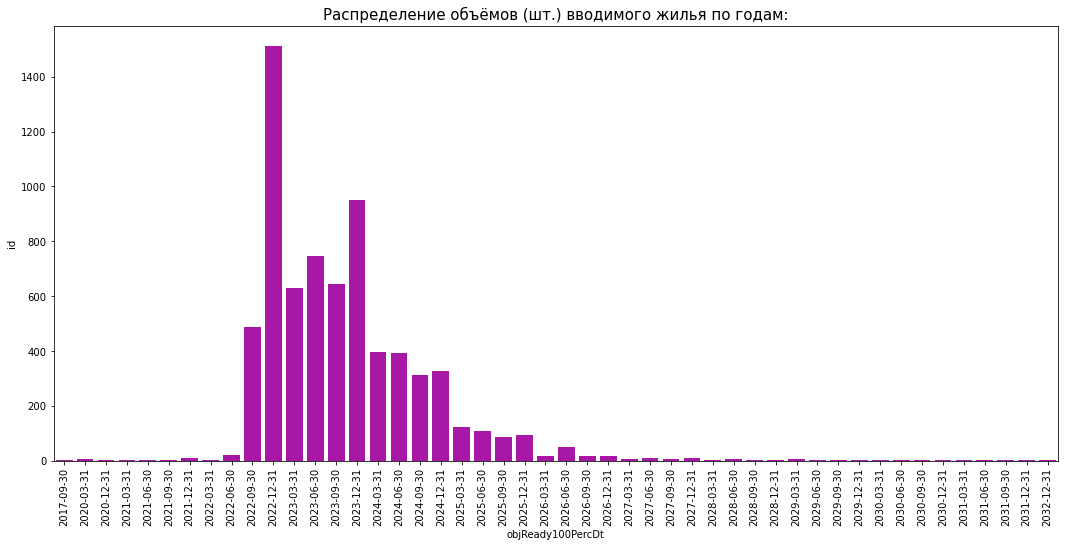

In [90]:
# Распределение объёмов (шт.) вводимого жилья по годам
df.objReady100PercDt = pd.to_datetime(df.objReady100PercDt).apply(lambda x: x.date())

plt.figure(figsize=(18, 8))
sns.barplot(data=df.query('objSquareLiving > 0 and objPriceAvg > 0').sort_values('objReady100PercDt'),
            x='objReady100PercDt',
            y='id',
            estimator=len,
           color='m')
plt.xticks(rotation='vertical')
plt.title('Распределение объёмов (шт.) вводимого жилья по годам:', size=15);

Можно заметить 2 моды среди дат окончания, это: 2022-12-31, примерно ~1900 новостроек будет готово 2023-12-31, примерно ~1000 новостроек

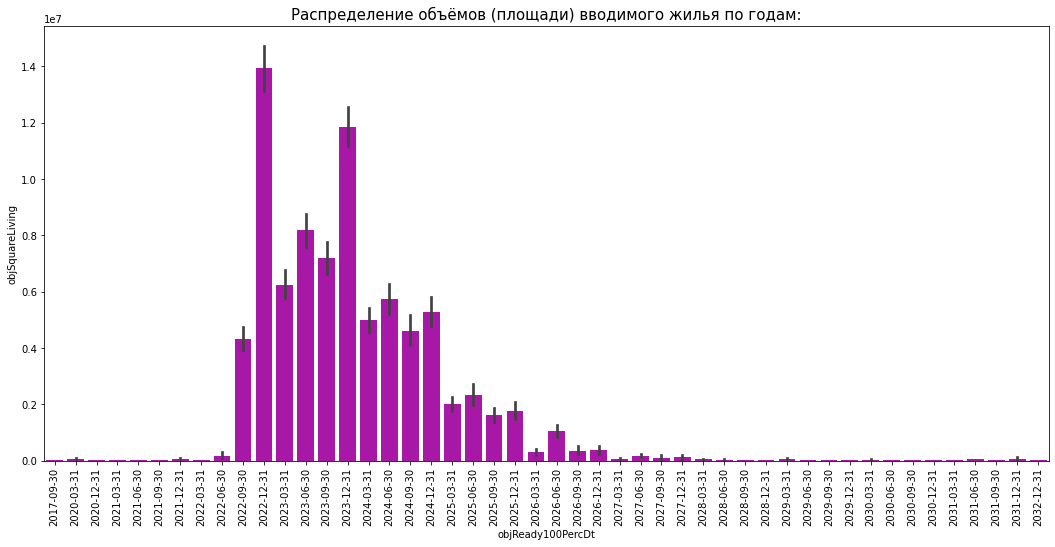

In [89]:
# Распределение объёмов (площади) вводимого жилья по годам
plt.figure(figsize=(18, 8))
sns.barplot(data=df.query('objSquareLiving > 0 and objPriceAvg > 0').sort_values('objReady100PercDt'),
            x='objReady100PercDt',
            y='objSquareLiving',
            estimator=sum,
           color='m')
plt.xticks(rotation='vertical')
plt.title('Распределение объёмов (площади) вводимого жилья по годам:', size=15);

Аналогичная ситуация наблюдается в те же годы - 2022-12-31 и 2023-12-31 - наибольшая площадь вводимого жилья.

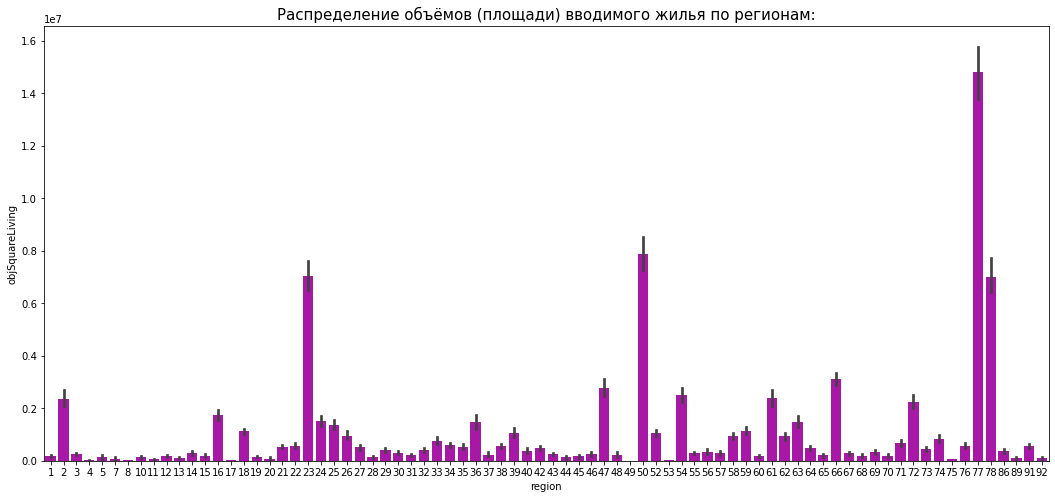

In [95]:
# посмотрим в каких регионах вводится больше всего жилья в штуках и объёмах:
plt.figure(figsize=(18, 8))
sns.barplot(data=df.query('objSquareLiving > 0 and objPriceAvg > 0').sort_values('objReady100PercDt'),
            x='region',
            y='objSquareLiving',
            estimator=sum,
           color='m')
plt.title('Распределение объёмов (площади) вводимого жилья по регионам:', size=15);

В топ-5 регионов по кол-ву вводимого жилья входят: 77, 50, 78, 23 и 66

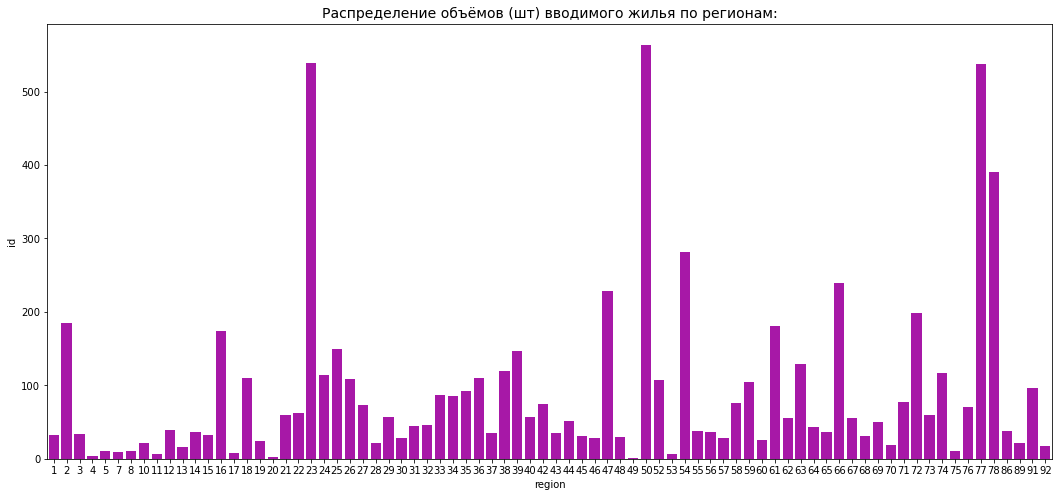

In [97]:
plt.figure(figsize=(18, 8))
sns.barplot(data=df.query('objSquareLiving > 0 and objPriceAvg > 0').sort_values('objReady100PercDt'),
            x='region',
            y='id',
            estimator=len,
           color='m')
plt.title('Распределение объёмов (шт) вводимого жилья по регионам:', size=14);

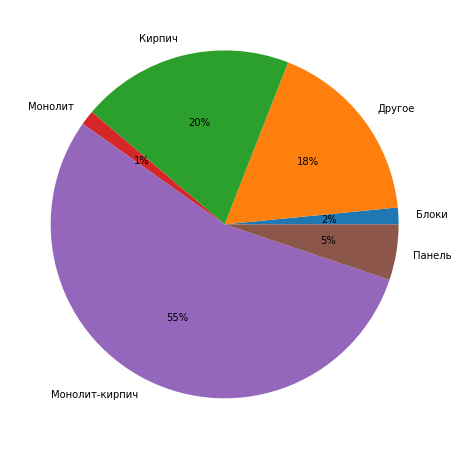

In [98]:
# Посмотрим на виды материала, из которого строятся здание
plt.figure(figsize=(8, 8))
plt.pie(data=df.groupby('wallMaterialShortDesc').agg(cnt_types_material=('id', 'count')).reset_index(),
        x='cnt_types_material',
        labels='wallMaterialShortDesc',
        autopct = '%0.0f%%');

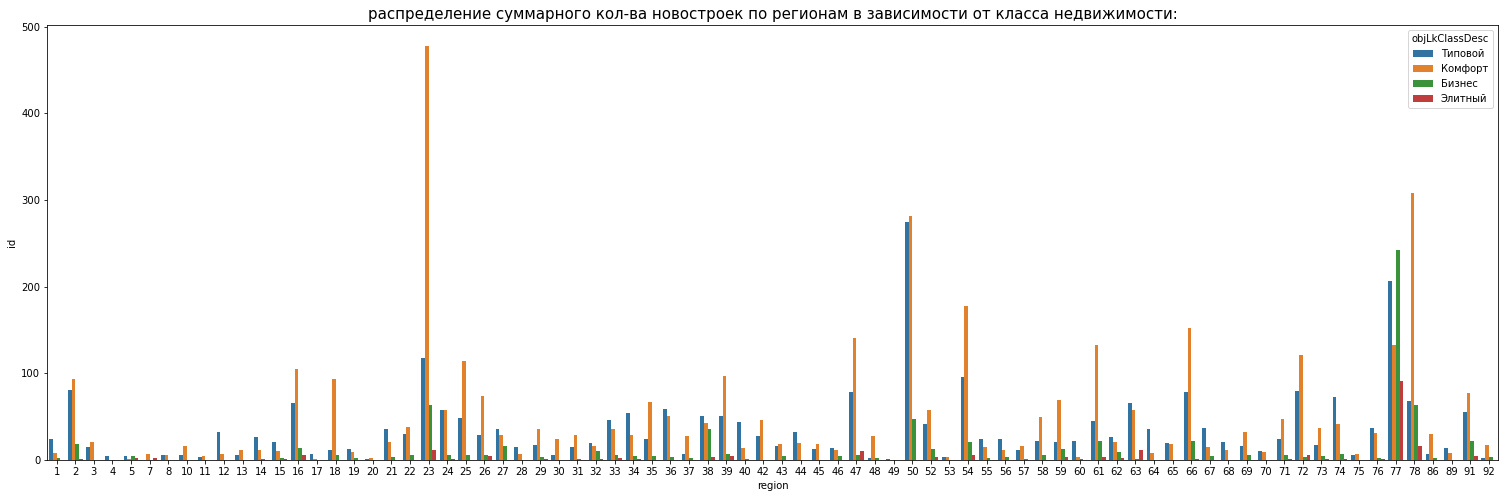

In [118]:
# распределение суммарного кол-ва новостроек по регионам в зависимости от класса недвижимости
plt.figure(figsize=(26, 8))

sns.barplot(data=df.sort_values('objReady100PercDt'), 
            x='region',
            y='id',
            hue='objLkClassDesc',
            estimator=len)
plt.title('распределение суммарного кол-ва новостроек по регионам в зависимости от класса недвижимости:', size=15);

Как видим, огромное кол-во квартир класса "Комфорт" строится в 23 регионе. Новостройки класса "Бизнес" преимущественно находятся в 77 регионе.

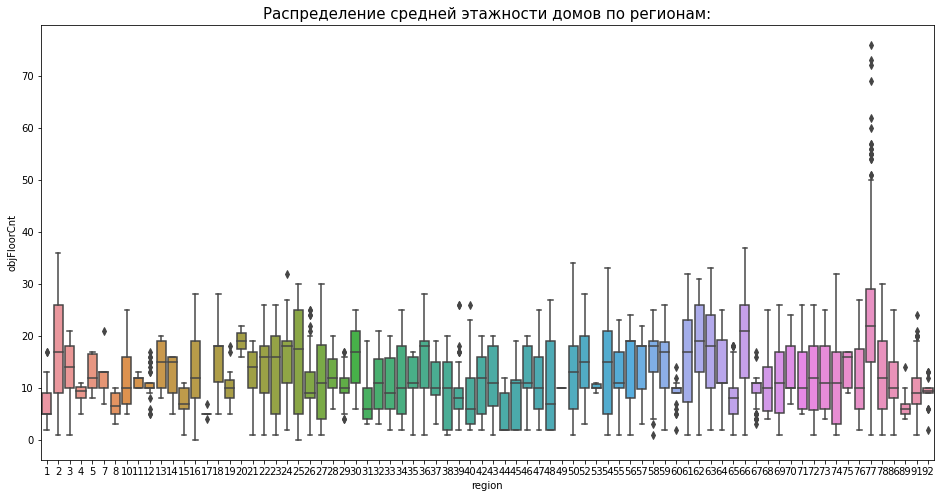

In [114]:
# Распределение средней этажности домов по регионам
plt.figure(figsize=(16, 8))
sns.boxplot(data=df.sort_values('objReady100PercDt'),
            x='region',
            y='objFloorCnt')
plt.title('Распределение средней этажности домов по регионам:', size=15);

Можно заметить, что небоскрёбы (кол-во этажей > 35) находятся в 77 регионе.

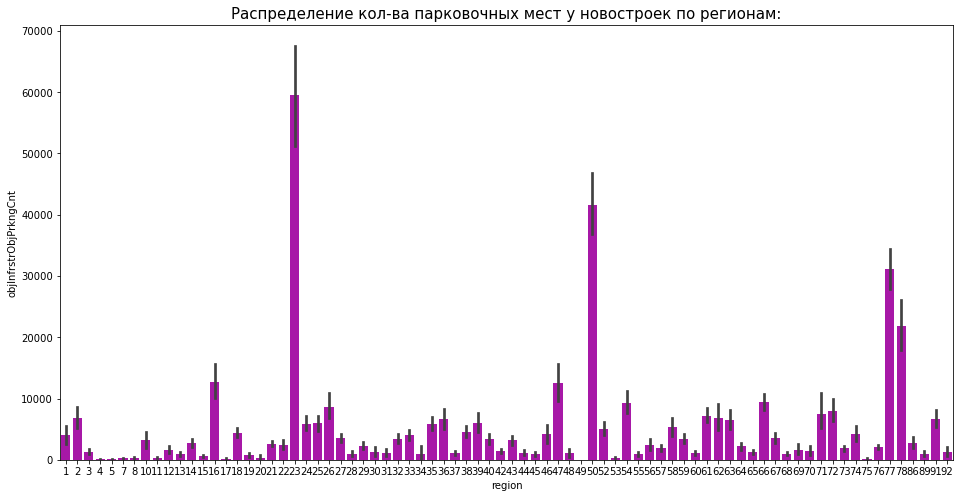

In [119]:
# Распределение кол-ва парковочных мест у новостроек по регионам
plt.figure(figsize=(16, 8))
sns.barplot(data=df.sort_values('objReady100PercDt'),
            x='region',
            y='objInfrstrObjPrkngCnt',
            estimator=sum,
           color='m')
plt.title('Распределение кол-ва парковочных мест у новостроек по регионам:', size=15);

Как видим выделяется особенно 23, 50, 77 и 78 регионы.